In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Nx = 200
cfl = 0.2 # CFL Number
tmax = 1 # time 0 ~ 1
viscosity_coeff = (0.01/math.pi)
x = np.linspace(-1, 1, 200)

#t = 0 ,I.C
u = -1 * np.sin(math.pi * x)
dx = abs(x[1] - x[0])

dt = cfl * dx / np.max(np.abs(u))

nt = int(tmax / dt) + 1

uf = np.zeros((nt,Nx))
uf[0, :] = u

print(nt)
print(dt)
print(nt * dt, tmax )


498
0.0020101128725153656
1.001036210512652 1


In [3]:
np.roll(u, 1) # rollは1step前の情報を組み込む

array([-1.22464680e-16,  1.22464680e-16,  3.15685498e-02,  6.31056313e-02,
        9.45798078e-02,  1.25959705e-01,  1.57214043e-01,  1.88311666e-01,
        2.19221577e-01,  2.49912962e-01,  2.80355229e-01,  3.10518032e-01,
        3.40371303e-01,  3.69885285e-01,  3.99030558e-01,  4.27778068e-01,
        4.56099159e-01,  4.83965601e-01,  5.11349616e-01,  5.38223906e-01,
        5.64561683e-01,  5.90336692e-01,  6.15523241e-01,  6.40096223e-01,
        6.64031143e-01,  6.87304143e-01,  7.09892022e-01,  7.31772266e-01,
        7.52923064e-01,  7.73323331e-01,  7.92952733e-01,  8.11791702e-01,
        8.29821460e-01,  8.47024034e-01,  8.63382275e-01,  8.78879879e-01,
        8.93501396e-01,  9.07232251e-01,  9.20058757e-01,  9.31968129e-01,
        9.42948495e-01,  9.52988909e-01,  9.62079363e-01,  9.70210796e-01,
        9.77375101e-01,  9.83565137e-01,  9.88774735e-01,  9.92998700e-01,
        9.96232822e-01,  9.98473878e-01,  9.99719634e-01,  9.99968847e-01,
        9.99221269e-01,  

In [4]:
u

array([ 1.22464680e-16,  3.15685498e-02,  6.31056313e-02,  9.45798078e-02,
        1.25959705e-01,  1.57214043e-01,  1.88311666e-01,  2.19221577e-01,
        2.49912962e-01,  2.80355229e-01,  3.10518032e-01,  3.40371303e-01,
        3.69885285e-01,  3.99030558e-01,  4.27778068e-01,  4.56099159e-01,
        4.83965601e-01,  5.11349616e-01,  5.38223906e-01,  5.64561683e-01,
        5.90336692e-01,  6.15523241e-01,  6.40096223e-01,  6.64031143e-01,
        6.87304143e-01,  7.09892022e-01,  7.31772266e-01,  7.52923064e-01,
        7.73323331e-01,  7.92952733e-01,  8.11791702e-01,  8.29821460e-01,
        8.47024034e-01,  8.63382275e-01,  8.78879879e-01,  8.93501396e-01,
        9.07232251e-01,  9.20058757e-01,  9.31968129e-01,  9.42948495e-01,
        9.52988909e-01,  9.62079363e-01,  9.70210796e-01,  9.77375101e-01,
        9.83565137e-01,  9.88774735e-01,  9.92998700e-01,  9.96232822e-01,
        9.98473878e-01,  9.99719634e-01,  9.99968847e-01,  9.99221269e-01,
        9.97477646e-01,  

In [5]:
def minmod(a, b):
    return 0.5*(np.sign(a)+np.sign(b)) * np.minimum(np.abs(a), np.abs(b))

In [6]:
def f(u):
    y = 0.5 * u**2
    yp =  u
    return y, yp

In [7]:
def RHS(u, dx, viscosity_coeff):

    #diffusion term
     diffusion_term = viscosity_coeff * (np.roll(u, 1)- 2*u + np.roll(u, -1))/ dx**2

     ux = minmod(( u - np.roll(u, 1))/dx, (np.roll(u,-1) - u)/dx )
     uL = np.roll(u - 0.5 * dx * ux,1)
     uR = u - 0.5 * dx * ux
     fL,fpL = f(uL)
     fR,fpR = f(uR)
     a = np.maximum(np.abs(fpL), np.abs(fpR))

     H =  0.5 *( fL + fR - a *(uR - uL) )

     conv_term = -(np.roll(H, -1)- H)/dx

     y = conv_term + diffusion_term
     return y


In [8]:
for i in range(1, nt):
    u1 = u + dt * RHS(u, dx, viscosity_coeff)
    u = 0.5 * u + 0.5 * (u1 + dt * RHS(u1, dx, viscosity_coeff))
    uf[i, :] = u

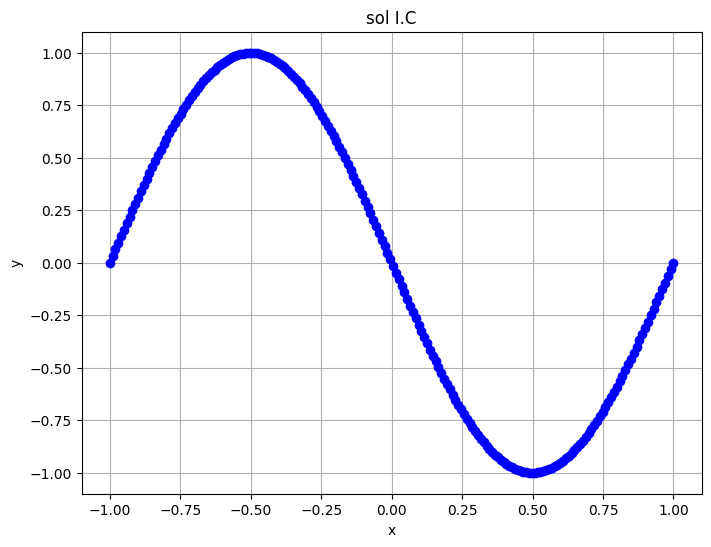

In [9]:
plt.figure(figsize=(8,6))
plt.plot(x, uf[0], '-o', color = 'b')
plt.title("sol I.C")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

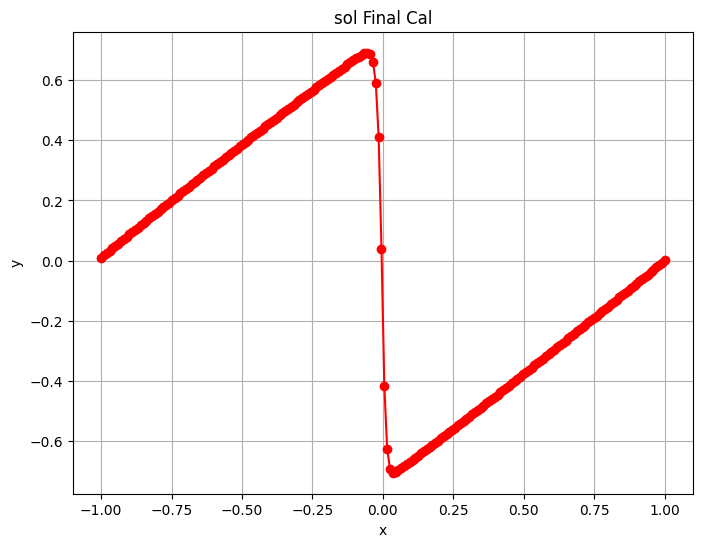

In [10]:
plt.figure(figsize=(8,6))
plt.plot(x, uf[-1], '-o', color = 'r')
plt.title("sol Final Cal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

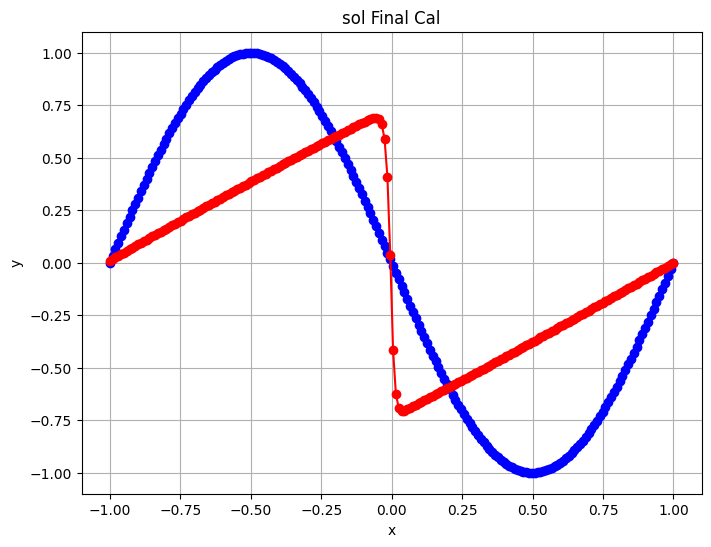

In [11]:
plt.figure(figsize=(8,6))
plt.plot(x, uf[0], '-o', color = 'b')
plt.plot(x, uf[-1], '-o', color = 'r')
plt.title("sol Final Cal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [12]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi = 3000)
sns.heatmap(uf.T, cmap='jet')

<Axes: >